In [1]:
from networks import *

In [2]:
features = ['r', 'perc_time']
target = ['r']
window = 32
forward_length = 2

reader = PriceReader()
val = reader(['BERRIES'], [2])
val_set = Unsupervised(val, window, features, forward_length)
vl = DataLoader(val_set, batch_size=len(val_set), num_workers=16, shuffle=False)

In [3]:
model = NetTrader.load_from_checkpoint('lightning_logs/version_14/checkpoints/epoch=8-step=5616.ckpt')

In [4]:
out = model(next(iter(vl))[0])

In [5]:
out = out.detach().numpy()
out

array([[-0.6606893 , -0.9992981 ],
       [-1.        , -0.9999259 ],
       [-0.9999989 ,  0.99996847],
       ...,
       [ 0.99994767,  0.9999995 ],
       [ 1.        ,  0.9999994 ],
       [-0.9999998 , -0.38186383]], dtype=float32)

In [8]:
val['strat'] = [0] * 10000
val['strat'][:9965]  = val['r'].shift(-1)[:9965] * out[:, 0]
val['strat'] += 1
val['strat'] = val['strat'].cumprod()

C:\Users\fu306\AppData\Local\Temp\ipykernel_14968\2411673744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['strat'][:9965]  = val['r'].shift(-1)[:9965] * out[:, 0]


<Axes: xlabel='timestamp'>

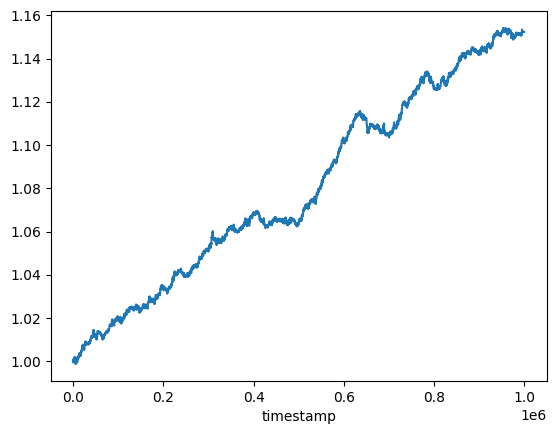

In [10]:
val['strat'].plot()

In [11]:
out[:, 0].T

array([-0.6606893 , -1.        , -0.9999989 , ...,  0.99994767,
        1.        , -0.9999998 ], dtype=float32)

In [12]:
print(list(out[:, 0].flatten()))

[-0.6606893, -1.0, -0.9999989, 0.99997973, -0.99999994, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -0.99999946, 0.99833214, 1.0, -0.99997765, -0.99999815, -0.58643234, -1.0, 0.8449321, 1.0, -1.0, 1.0, -1.0, -0.99999994, 0.088505425, 0.9999796, 0.63250107, -0.999697, -0.9999502, -1.0, 0.9999992, -1.0, -0.5416141, -0.99942523, 0.94623125, -0.97594905, -0.9996128, 0.6419473, -0.9997118, -1.0, -0.99999344, 0.8374108, -1.0, 0.9720573, 0.99999416, 0.8745314, -1.0, -0.99932534, -0.99999976, 0.98529345, -0.9999943, -1.0, 0.9991662, 0.99987406, 0.99999964, 0.9989862, 0.9999993, -1.0, 1.0, 0.9999987, -0.999942, -1.0, 1.0, -1.0, -1.0, -0.9999617, -0.9999923, -1.0, 0.9999994, -0.98620814, -0.83263344, -0.99998754, 1.0, -1.0, -0.9999998, -1.0, 0.9637845, -1.0, 0.99982166, 0.99741447, 0.9930296, 0.82905185, -0.74573994, -1.0, -0.9999836, 0.99979293, -0.93964404, 0.99999815, 1.0, -1.0, -0.9999939, -0.9909641, -0.99999666, -0.99967515, 0.9999806, -0.1185594, -0.99999994, -0.72760075, -1.0, 0.9970231, -0.999828

In [13]:
model.state_dict()

OrderedDict([('model.to_hidden.weight',
              tensor([[-0.0100,  0.0349,  0.0487,  ...,  0.1291,  0.7766,  0.0229],
                      [-0.1050,  0.0224,  0.0979,  ..., -0.1043,  0.3653,  0.0493],
                      [ 0.0831, -0.0829, -0.0837,  ..., -0.0281, -0.4017, -0.0337],
                      ...,
                      [ 0.0369,  0.1169,  0.1424,  ...,  0.0353,  0.5631,  0.0291],
                      [ 0.0940,  0.0243, -0.1223,  ..., -0.0025, -0.3590, -0.0628],
                      [ 0.0437,  0.0482,  0.0768,  ..., -0.0457, -0.5649,  0.0590]])),
             ('model.to_hidden.bias',
              tensor([-0.0752,  0.1204,  0.1016,  0.1109,  0.0261, -0.1101, -0.0349,  0.0101,
                       0.1119, -0.0640,  0.0454,  0.0435,  0.0543, -0.0286,  0.0611, -0.1054,
                       0.0574,  0.0660,  0.0114,  0.1686, -0.0125, -0.0526, -0.0037, -0.0222,
                       0.0080,  0.1043,  0.0417, -0.0650,  0.0701, -0.0792, -0.0130,  0.0575,
            

In [14]:
import pyperclip
pyperclip.copy(str(list(out[:, 0].flatten())))

In [15]:
print(model.state_dict().keys())

odict_keys(['model.to_hidden.weight', 'model.to_hidden.bias', 'model.hidden.0.weight', 'model.hidden.0.bias', 'model.to_out.weight', 'model.to_out.bias'])


In [24]:
pyperclip.copy(str(model.state_dict()['model.to_out.bias'].numpy().tolist()))